In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [3]:
from EDA import *
from data_clean import *

In [4]:
# df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl')
df = pd.read_pickle('data/data_in_Dataframe.pkl') 
df_median = pd.read_pickle('data/scaled_df_median.pkl') 
df_knn = pd.read_pickle('data/scaled_df_knn.pkl') 
df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl') 


In [5]:
# from now on until model development I will use the median imputed dataset
df_median

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Last Location Name_encoded,Handset Manufacturer_encoded,Handset Type_encoded
0,0.99,0.77,0.66,0.98,0.41,0.00,0.36,0.00,0.00,0.00,...,0.44,0.33,0.87,0.20,0.53,0.45,0.34,0.02,0.69,0.19
1,0.99,0.24,0.61,0.73,0.41,0.00,0.36,0.00,0.00,0.00,...,0.78,0.72,0.07,0.62,0.91,0.67,0.72,0.01,0.69,0.19
2,0.99,0.00,0.65,0.73,0.41,0.00,0.35,0.00,0.00,0.00,...,0.28,0.27,0.02,0.49,0.25,0.33,0.30,0.01,0.69,0.13
3,0.99,0.49,0.17,0.71,0.41,0.00,0.35,0.00,0.00,0.00,...,0.05,0.95,0.66,0.89,0.77,0.54,0.94,0.01,0.15,0.45
4,0.99,0.57,0.95,0.58,0.41,0.00,0.35,0.00,0.00,0.00,...,0.02,0.63,0.21,0.65,0.84,0.47,0.63,0.00,0.69,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.06,0.45,0.21,0.04,0.41,0.00,0.36,0.00,0.00,0.00,...,0.89,0.62,0.56,0.00,0.81,0.73,0.63,0.00,1.00,0.15
149997,0.07,0.48,0.19,0.05,0.41,0.00,0.36,0.00,0.00,0.00,...,0.97,0.74,0.29,0.84,0.15,0.48,0.74,0.00,1.00,0.26
149998,0.99,0.28,0.81,0.05,0.41,0.00,0.36,0.00,0.00,0.00,...,0.23,0.66,0.81,0.14,0.68,0.42,0.65,0.00,1.00,0.07
149999,0.99,0.70,0.33,0.05,0.41,0.00,0.87,0.00,0.00,0.00,...,0.60,0.42,0.15,0.97,0.08,0.35,0.41,0.00,0.58,0.04


In [6]:
df_median.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

# Univariate analysis

In [7]:
complete_cols = [x for x in df.columns if df[x].isnull().sum()==0]
complete_cols

['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']

In [8]:
# Top 10 handsets used by customers
df['Handset Type'].value_counts()[:10]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [9]:
# Top 3 handset manufacturers
df['Handset Manufacturer'].value_counts()[:3]


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [10]:
df['Handset Manufacturer'].value_counts().index[:3]


Index(['Apple', 'Samsung', 'Huawei'], dtype='object')

In [11]:
top_handsets_per_top_manufactueres(df=df,manufacturers=3,handsets=5)

Top 5 Handsets per top 3 Manufacturers is: 

Top 1 Manufacturer: Apple
 And top products are :
		1.Apple iPhone 6S (A1688):  15.813%
		2.Apple iPhone 6 (A1586):  15.148%
		3.Apple iPhone 7 (A1778):  10.62%
		4.Apple iPhone Se (A1723):  8.708%
		5.Apple iPhone 8 (A1905):  8.382%
Top 2 Manufacturer: Samsung
 And top products are :
		1.Samsung Galaxy S8 (Sm-G950F):  11.068%
		2.Samsung Galaxy A5 Sm-A520F:  9.119%
		3.Samsung Galaxy J5 (Sm-J530):  9.05%
		4.Samsung Galaxy J3 (Sm-J330):  8.531%
		5.Samsung Galaxy S7 (Sm-G930X):  7.833%
Top 3 Manufacturer: Huawei
 And top products are :
		1.Huawei B528S-23A:  57.38%
		2.Huawei E5180:  6.04%
		3.Huawei P20 Lite Huawei Nova 3E:  5.871%
		4.Huawei P20:  4.299%
		5.Huawei Y6 2018:  2.896%


In [12]:
df_median.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Last Location Name_encoded,Handset Manufacturer_encoded,Handset Type_encoded
count,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00",...,"150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00","150,001.00"
mean,0.51,0.50,0.50,0.05,0.41,0.00,0.49,0.00,0.00,0.04,...,0.50,0.50,0.50,0.50,0.50,0.51,0.50,0.01,0.73,0.30
std,0.46,0.29,0.29,0.04,0.00,0.00,0.23,0.01,0.01,0.06,...,0.29,0.29,0.29,0.29,0.29,0.15,0.27,0.09,0.28,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.25,0.25,0.03,0.41,0.00,0.36,0.00,0.00,0.00,...,0.25,0.25,0.25,0.25,0.25,0.40,0.26,0.00,0.58,0.07
50%,0.07,0.50,0.50,0.04,0.41,0.00,0.36,0.00,0.00,0.00,...,0.50,0.50,0.50,0.50,0.50,0.51,0.50,0.00,0.69,0.19
75%,0.98,0.75,0.75,0.07,0.41,0.00,0.87,0.00,0.00,0.05,...,0.75,0.75,0.75,0.75,0.75,0.61,0.74,0.01,1.00,0.46
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Outlier Removal 

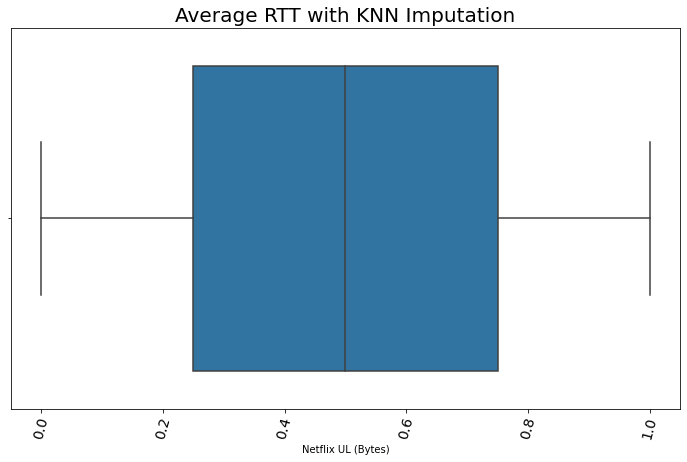

In [30]:
plot_box(df_knn,'Netflix UL (Bytes)','Average RTT with KNN Imputation')

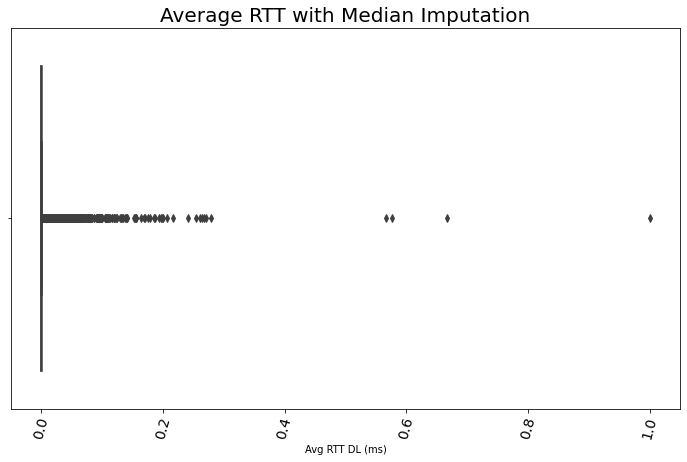

In [16]:
plot_box(df_median,'Avg RTT DL (ms)','Average RTT with Median Imputation')

In [18]:
df_median['Avg RTT DL (ms)'] = fix_outlier(df=df_median,column='Avg RTT DL (ms)')

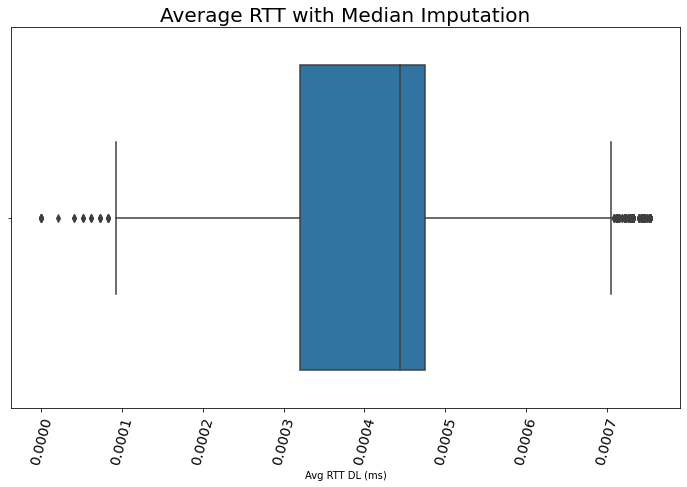

In [19]:
plot_box(df_median,'Avg RTT DL (ms)','Average RTT with Median Imputation')

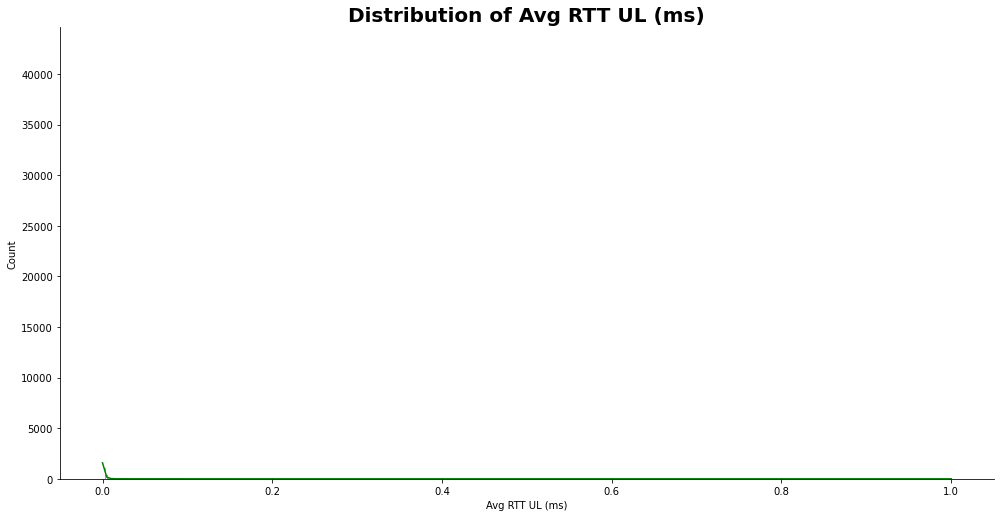

In [26]:
plot_hist(df_median,'Avg RTT UL (ms)','green')

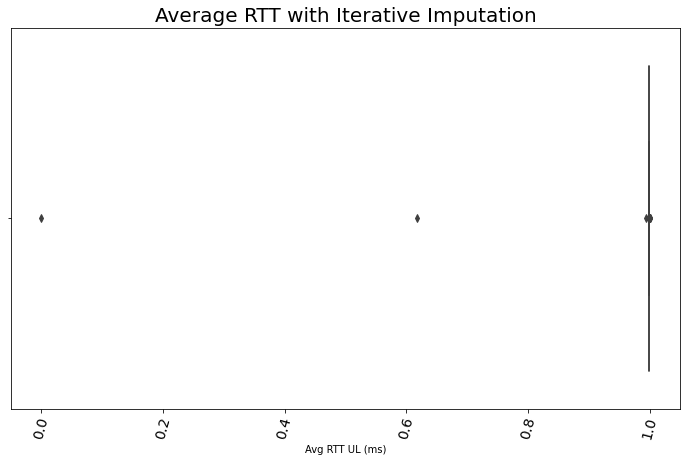

In [20]:
plot_box(df_iterative,'Avg RTT UL (ms)','Average RTT with Iterative Imputation')

In [15]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total UL (Bytes)'>

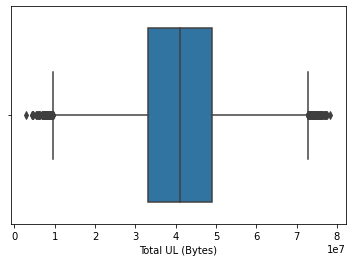

In [16]:
#box plot
sns.boxplot(df['Total UL (Bytes)'])


In [12]:
df_knn.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

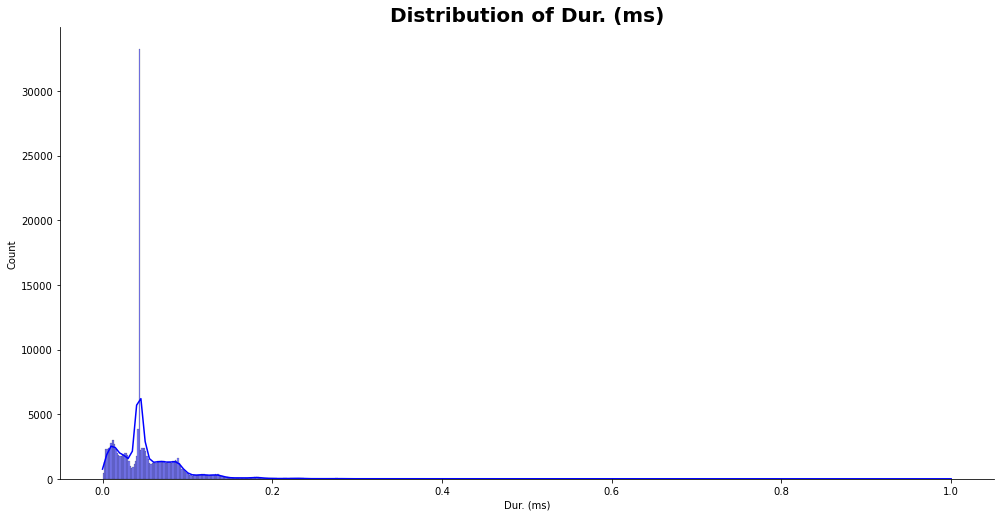

In [13]:
plot_hist(df_knn,'Dur. (ms)','blue')

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bearer Id', ylabel='Density'>

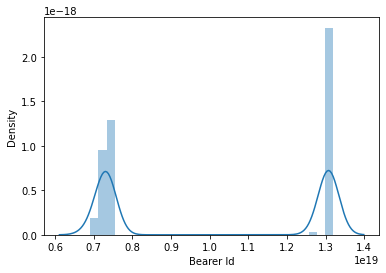

In [17]:
#distribution plot
sns.distplot(df['Bearer Id'])

In [18]:
msno.heatmap(df[missing_non_categorical_columns], labels = True)

NameError: name 'missing_non_categorical_columns' is not defined

In [ ]:
dfExp["fixed_num_medications"].describe()


## Categorical Variables

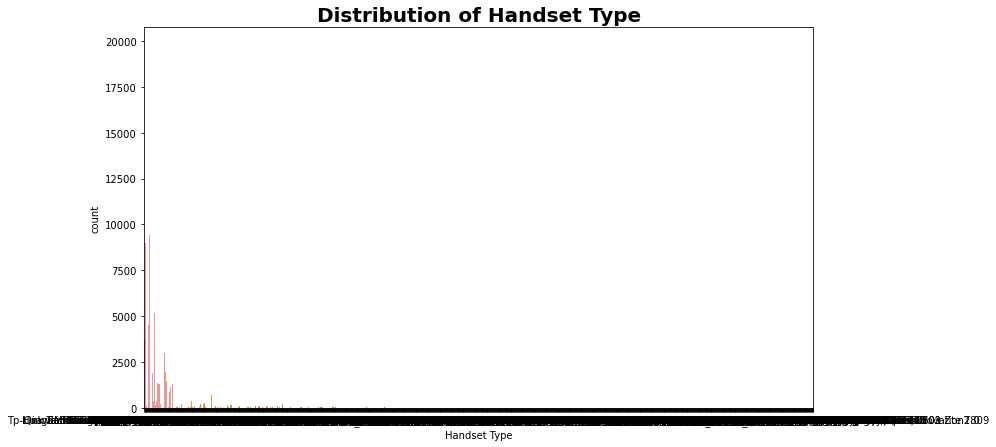

In [35]:

plot_count(df, "Handset Type")


# Multivariate Analysis


In [ ]:
plot_scatter(df.head(100), x_col="", y_col="", hue="race",
             style="race", title="number of medications vs number of lab procedures")

In [ ]:
plot_box_multi(dfExp, x_col="race", y_col="num_medications", title="number of medications outilers in race column")


In [ ]:
dfPair = dfExp[["race", "time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications"]]


In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             height=4)